In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="J1mmAuxLk77g4eiOvCmr")
project = rf.workspace("fruitectives-team").project("fruit-ripeness-unjex")
version = project.version(2)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30


Extracting Dataset Version Zip to Fruit-Ripeness-2 in yolov9:: 100%|██████████| 30490/30490 [00:04<00:00, 6515.99it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.6/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

# Load a pre-trained YOLOv9 small model (if available)
model = YOLO('yolov9s.pt')

In [5]:
import os
from sklearn.model_selection import train_test_split

import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image

In [6]:
import os
import yaml

# Path to your downloaded dataset folder
dataset_path = "/kaggle/working/Fruit-Ripeness-2" 

# Load class names from data.yaml
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    data = yaml.safe_load(f)

class_names = data['names']
print(f"Number of classes: {len(class_names)}")
print("Classes:", class_names)

def count_labels_in_folder(labels_folder):
    counts = [0] * len(class_names)
    for label_file in os.listdir(labels_folder):
        if label_file.endswith(".txt"):
            with open(os.path.join(labels_folder, label_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id = int(line.split()[0])
                    counts[class_id] += 1
    return counts

# Count labels in train and valid sets
train_labels_folder = os.path.join(dataset_path, "train", "labels")
test_labels_folder = os.path.join(dataset_path, "test", "labels")
valid_labels_folder = os.path.join(dataset_path, "valid", "labels")

train_counts = count_labels_in_folder(train_labels_folder)
test_counts = count_labels_in_folder(test_labels_folder)
valid_counts = count_labels_in_folder(valid_labels_folder)

print("\nImage counts:")
print(f"Train images: {len(os.listdir(os.path.join(dataset_path, 'train', 'images')))}")
print(f"Test images: {len(os.listdir(os.path.join(dataset_path, 'test', 'images')))}")
print(f"Validation images: {len(os.listdir(os.path.join(dataset_path, 'valid', 'images')))}")

print("\nLabel counts per class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: Train = {train_counts[i]}, Test = {test_counts[i]}, Valid = {valid_counts[i]}")


Number of classes: 32
Classes: ['Apple Overripe', 'Apple Ripe', 'Apple Rotten', 'Apple Unripe', 'Banana Overripe', 'Banana Ripe', 'Banana Rotten', 'Banana Unripe', 'Grape Overripe', 'Grape Ripe', 'Grape Rotten', 'Grape Unripe', 'Mango Overripe', 'Mango Ripe', 'Mango Rotten', 'Mango Unripe', 'Melon Overripe', 'Melon Ripe', 'Melon Rotten', 'Melon Unripe', 'Orange Overripe', 'Orange Ripe', 'Orange Rotten', 'Orange Unripe', 'Peach Overripe', 'Peach Ripe', 'Peach Rotten', 'Peach Unripe', 'Pear Overripe', 'Pear Ripe', 'Pear Rotten', 'Pear Unripe']

Image counts:
Train images: 13395
Test images: 612
Validation images: 1232

Label counts per class:
Apple Overripe: Train = 495, Test = 22, Valid = 46
Apple Ripe: Train = 851, Test = 23, Valid = 48
Apple Rotten: Train = 390, Test = 20, Valid = 35
Apple Unripe: Train = 417, Test = 19, Valid = 40
Banana Overripe: Train = 414, Test = 19, Valid = 29
Banana Ripe: Train = 3203, Test = 166, Valid = 318
Banana Rotten: Train = 360, Test = 28, Valid = 48
Ba

Train dataset has 13395 images.


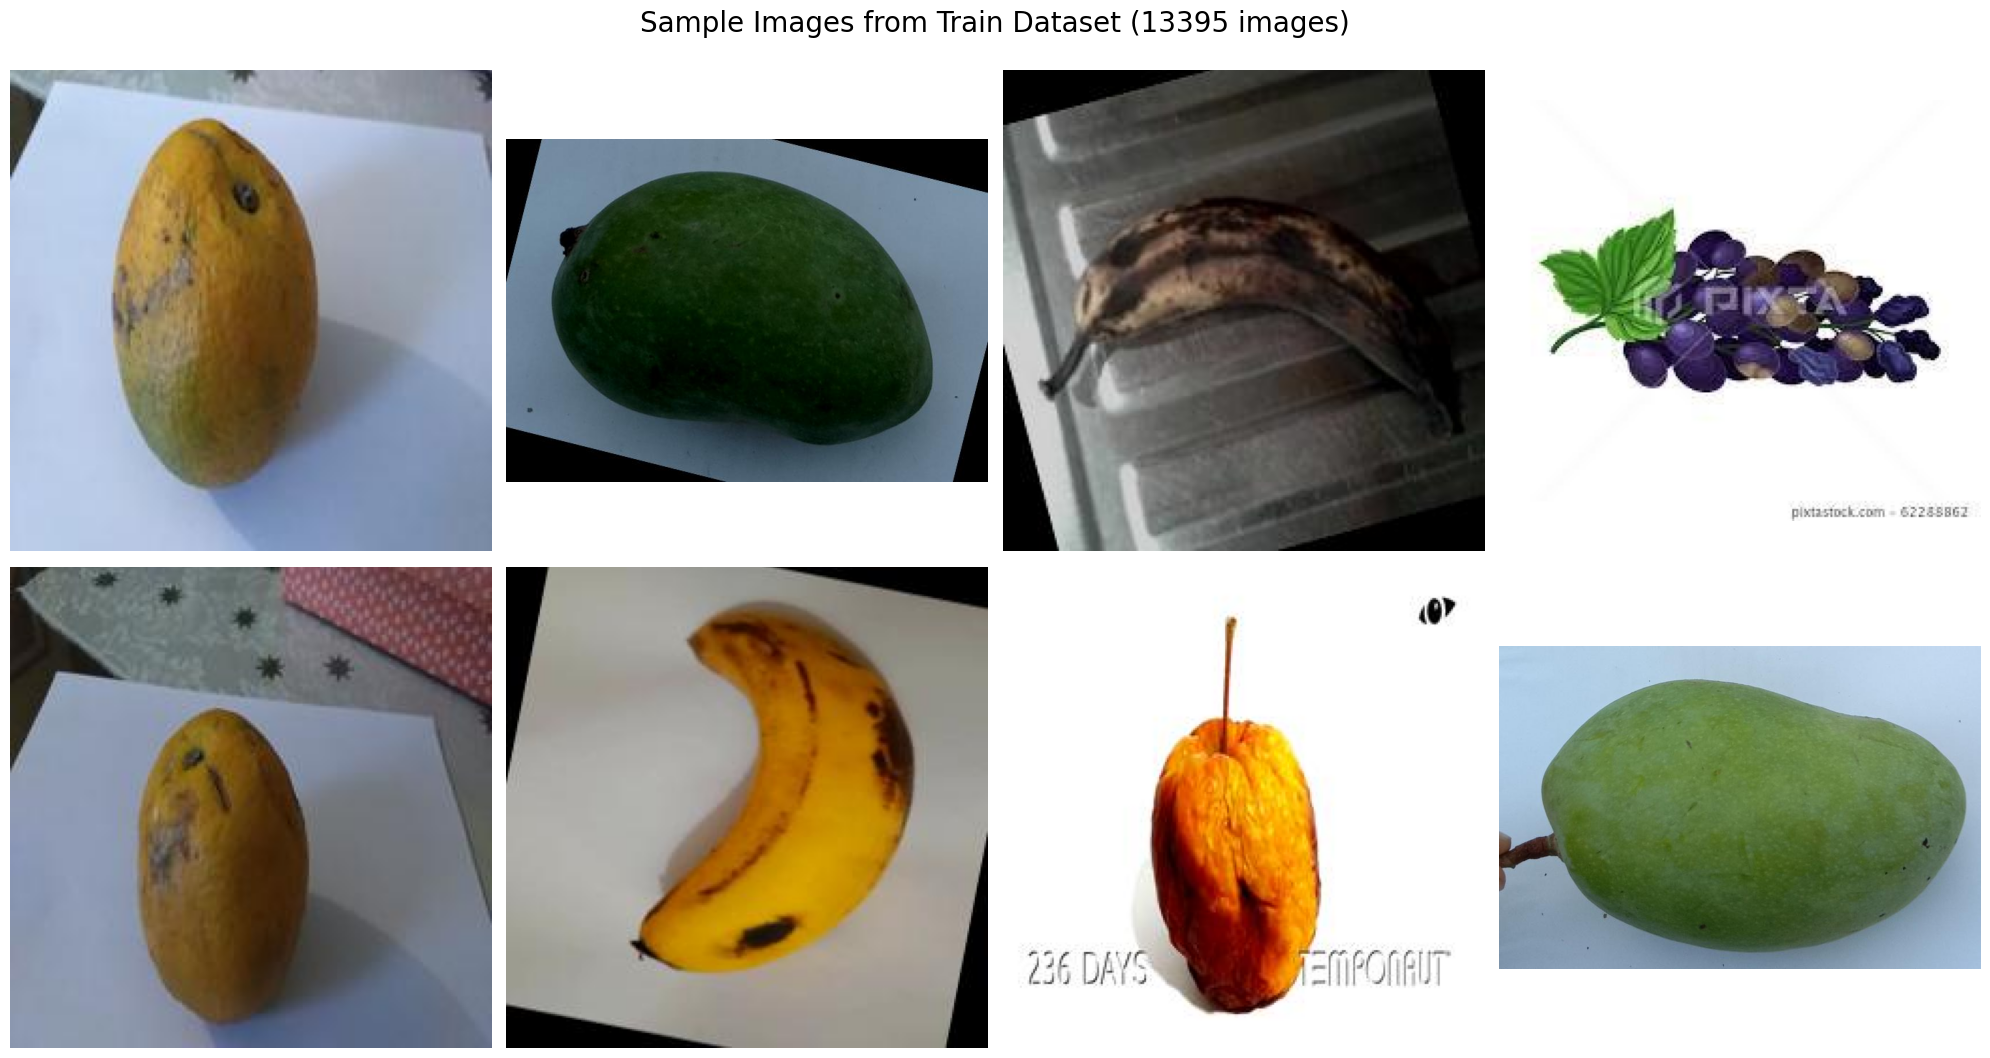

Test dataset has 612 images.


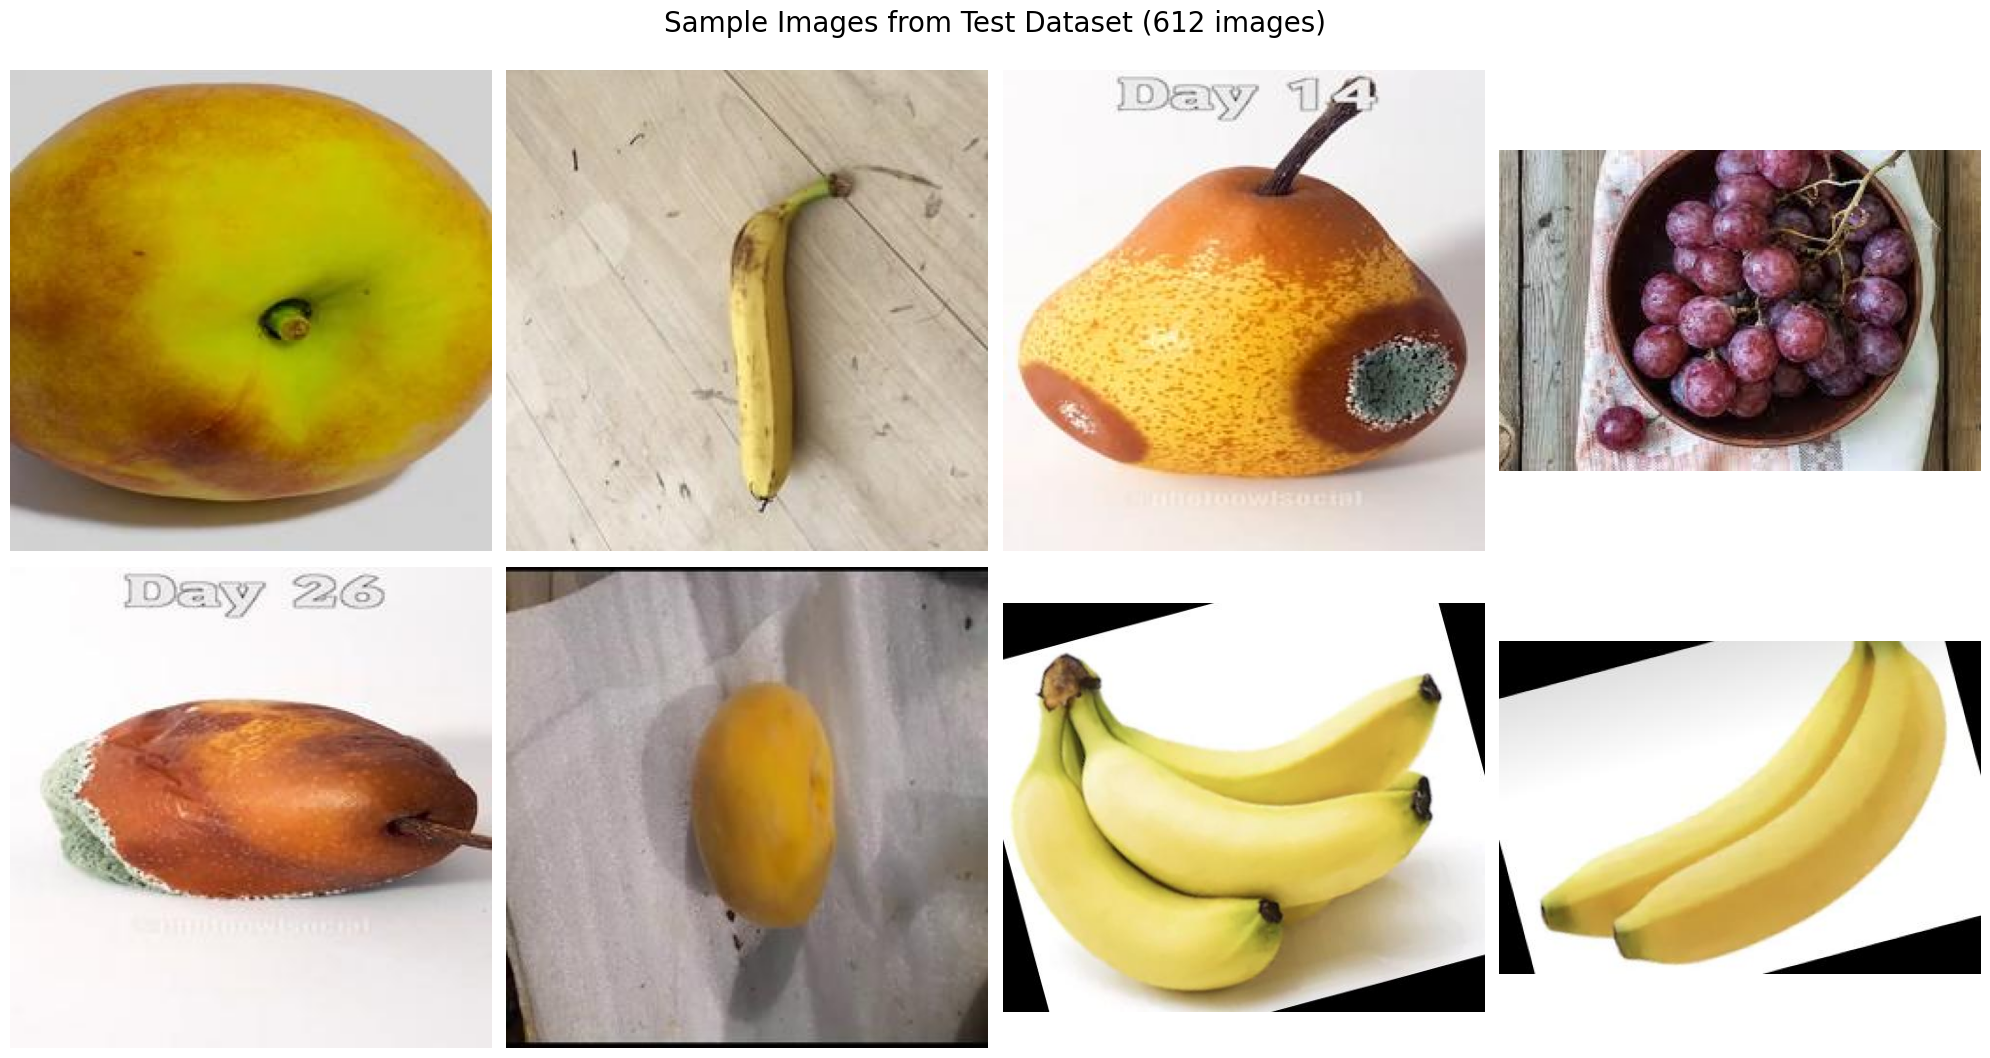

Val dataset has 1232 images.


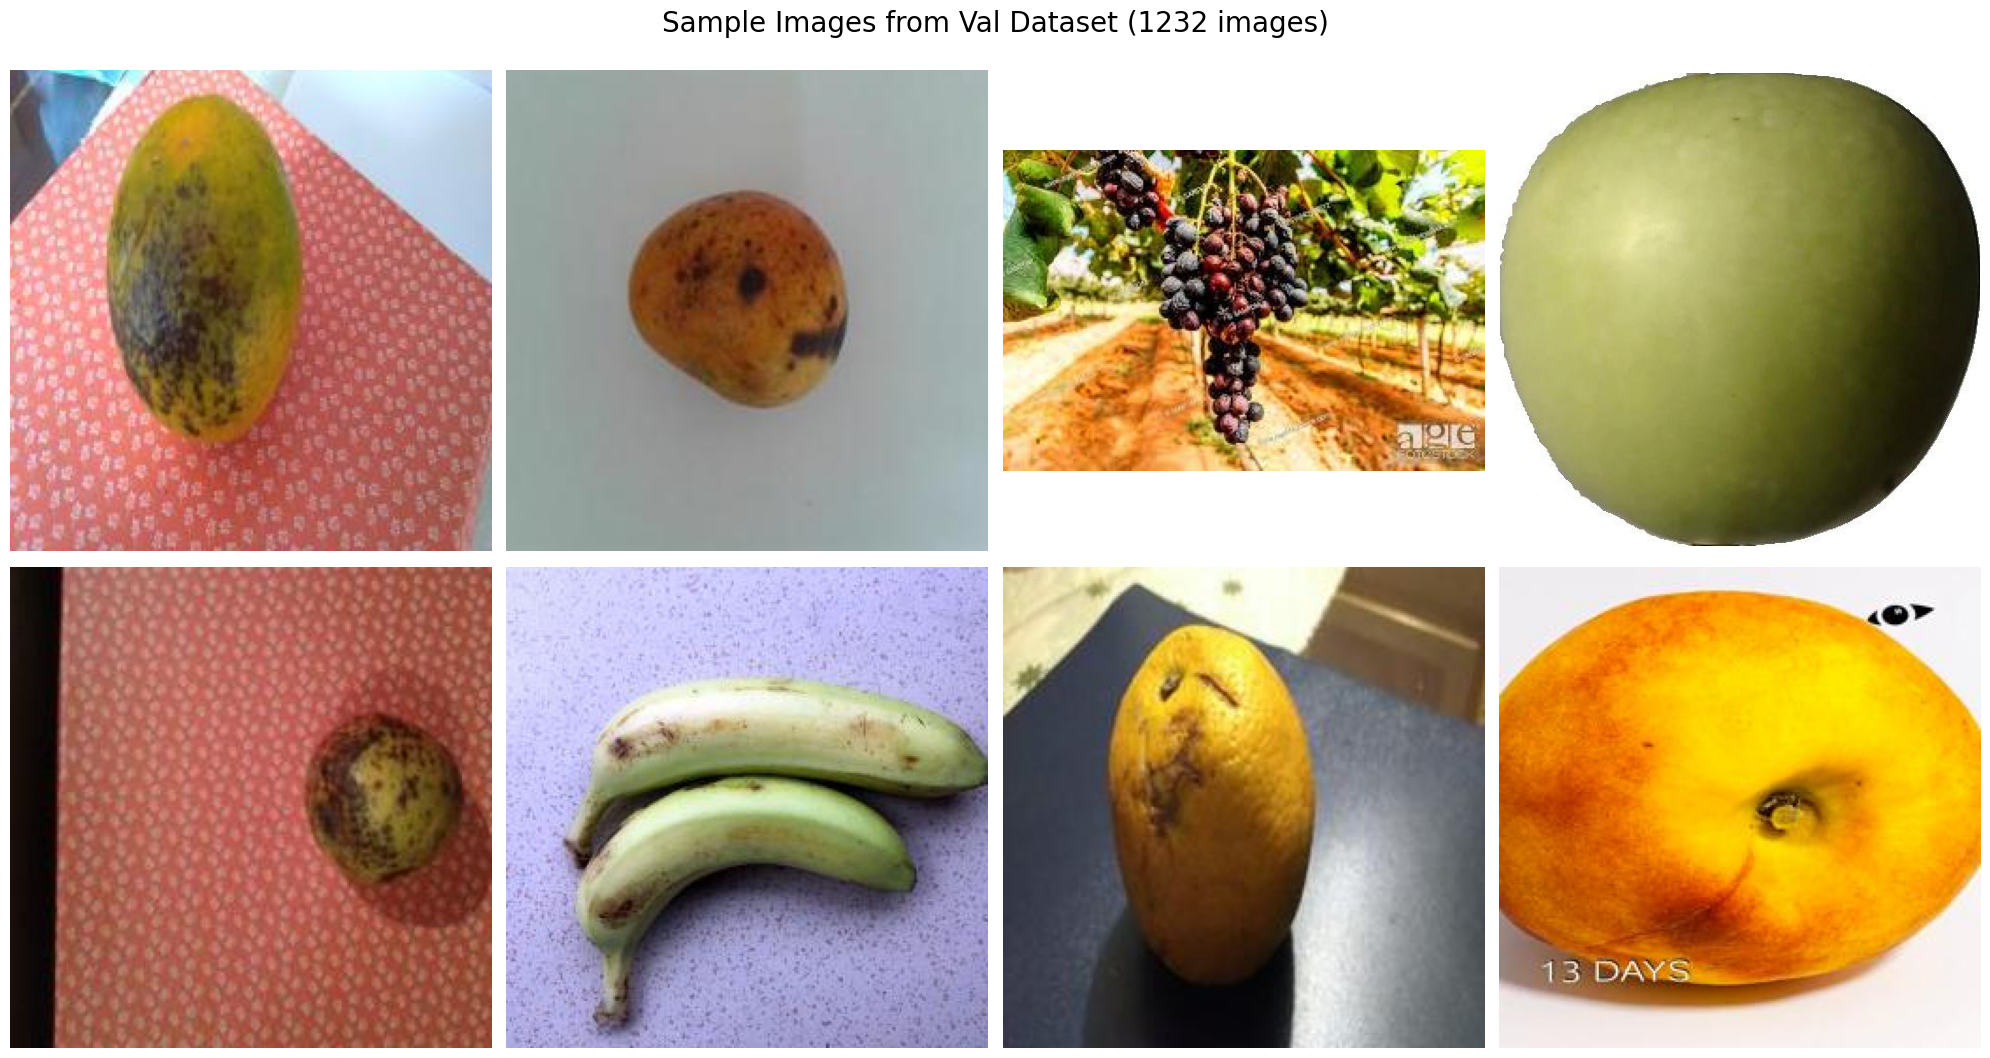

In [7]:
# Define the base paths for each dataset type
dataset_paths = {
    'train': '/kaggle/working/Fruit-Ripeness-2/train/images',
    'test': '/kaggle/working/Fruit-Ripeness-2/test/images',
    'val' : '/kaggle/working/Fruit-Ripeness-2/valid/images'
}
num_samples = 30
for dataset_name, image_folder in dataset_paths.items():
    if not os.path.isdir(image_folder):
        print(f"Directory {image_folder} does not exist.")
        continue
    image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    image_count = len(image_files)
    print(f"{dataset_name.capitalize()} dataset has {image_count} images.")
    if not image_files:
        print(f"No .jpg images found in the {image_folder} directory.")
        continue
    interval = max(1, image_count // num_samples)  
    selected_images = [image_files[i] for i in range(0, image_count, interval)][:num_samples] 

    # Create a 2x4 subplot for displaying 8 images
    fig, axes = plt.subplots(2, 4, figsize=(20, 11))

    # Display each of the selected images
    for ax, img_file in zip(axes.ravel(), selected_images):
        img_path = os.path.join(image_folder, img_file)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.axis('off')  # Hide axis

    # Set the title for each dataset, including the count of images
    plt.suptitle(f'Sample Images from {dataset_name.capitalize()} Dataset ({image_count} images)', fontsize=20)
    plt.tight_layout()
    plt.show()


In [8]:
import yaml

yaml_path = "/kaggle/working/Fruit-Ripeness-2/data.yaml"

with open(yaml_path, 'r') as file:
    content = yaml.safe_load(file)

print(content)

{'names': ['Apple Overripe', 'Apple Ripe', 'Apple Rotten', 'Apple Unripe', 'Banana Overripe', 'Banana Ripe', 'Banana Rotten', 'Banana Unripe', 'Grape Overripe', 'Grape Ripe', 'Grape Rotten', 'Grape Unripe', 'Mango Overripe', 'Mango Ripe', 'Mango Rotten', 'Mango Unripe', 'Melon Overripe', 'Melon Ripe', 'Melon Rotten', 'Melon Unripe', 'Orange Overripe', 'Orange Ripe', 'Orange Rotten', 'Orange Unripe', 'Peach Overripe', 'Peach Ripe', 'Peach Rotten', 'Peach Unripe', 'Pear Overripe', 'Pear Ripe', 'Pear Rotten', 'Pear Unripe'], 'nc': 32, 'roboflow': {'license': 'CC BY 4.0', 'project': 'fruit-ripeness-unjex', 'url': 'https://universe.roboflow.com/fruitectives-team/fruit-ripeness-unjex/dataset/2', 'version': 2, 'workspace': 'fruitectives-team'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [9]:
!yolo task=detect  mode=train data=/kaggle/working/Fruit-Ripeness-2/data.yaml model=yolov9s.pt epochs=40 imgsz=650 batch=8

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Fruit-Ripeness-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=650, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv